# **Default Payment Classification**

Name: Muhammad Fitri Amir bin Abdullah

Admin Number: P2222811

Class: DAAA/FT/2A/06
<hr>

## **Background Information:**
> A payment default usually happens after multiple payments on a loan or other debt are missed. The default happens when the lender decides to cut their losses. It also can be caused by spending over your credit limit, which forces your account into a default so that the lender can cut their losses.

Following this, I have to make a few assumptions:

- The bills and pays are on consecutive months
- The bills do not accumulate, and are individually calculated.

And based on the background context I gave in the first line, we can also conclude that people who spend more than their credit limit will be forced into a default.

In this task, I aim to predict customers of a bank who will have default payment using features such as:
- gender, 
- education, 
- credit limit<br> 
- payment history


## Importing Datasets/Libraries

In [2]:
#Importing the libraries and the dataset

# Basic libs
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


# Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import svm

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, Normalizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

df = pd.read_csv('../ST1511 AIML-CA1-datasets/credit_dataset.csv')

## **Exploratory Data Analysis**

In this section, I will analyze the data to understand its characteristics, identify patterns, and gain insights into the data

In [3]:
#check data loaded

df.head()

Customer ID  Credit Limit  Gender    Education Marriage Status  Age  \
0            1         20000  female  univeresity         married   24   
1            2        120000  female  univeresity          single   26   
2            3         90000  female  univeresity          single   34   
3            4         50000  female  univeresity         married   37   
4            5         50000    male  univeresity         married   57   

   Bill_Amount1  Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  \
0          3913          3102           689            0          689   
1          2682          1725          2682            0         1000   
2         29239         14027         13559         1518         1500   
3         46990         48233         49291         2000         2019   
4          8617          5670         35835         2000        36681   

   Pay_Amount3  Default payment next month  
0            0                           1  
1         1000                           1  
2         1000                           0  
3         1200                           0  
4        10000                           0

In [4]:
print(df.shape)
print(df.info())

df.isnull().sum()

df.nunique().sort_values()

(1600, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Customer ID                 1600 non-null   int64 
 1   Credit Limit                1600 non-null   int64 
 2   Gender                      1600 non-null   object
 3   Education                   1600 non-null   object
 4   Marriage Status             1600 non-null   object
 5   Age                         1600 non-null   int64 
 6   Bill_Amount1                1600 non-null   int64 
 7   Bill_Amount2                1600 non-null   int64 
 8   Bill_Amount3                1600 non-null   int64 
 9   Pay_Amount1                 1600 non-null   int64 
 10  Pay_Amount2                 1600 non-null   int64 
 11  Pay_Amount3                 1600 non-null   int64 
 12  Default payment next month  1600 non-null   int64 
dtypes: int64(10), object(3)
memory usage:

Gender                           2
Marriage Status                  2
Default payment next month       2
Education                        3
Age                             48
Credit Limit                    60
Pay_Amount3                    751
Pay_Amount2                    789
Pay_Amount1                    805
Bill_Amount3                  1373
Bill_Amount2                  1401
Bill_Amount1                  1440
Customer ID                   1600
dtype: int64

> As we can see, there are no null values in the datas given, and majority of the variables are integers, with gender,education and marriage status as objects. Furthermore, by using sort values, we can see that every feature has > 1 unique value, which means that I do not need to drop any other features.

## **Visualisation**

In this section, I will visualise the data given,through methods such as univariate and bivariate graphs.

C:\Users\Fitri\AppData\Local\Temp\ipykernel_32100\4249966827.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = corr_df.corr()


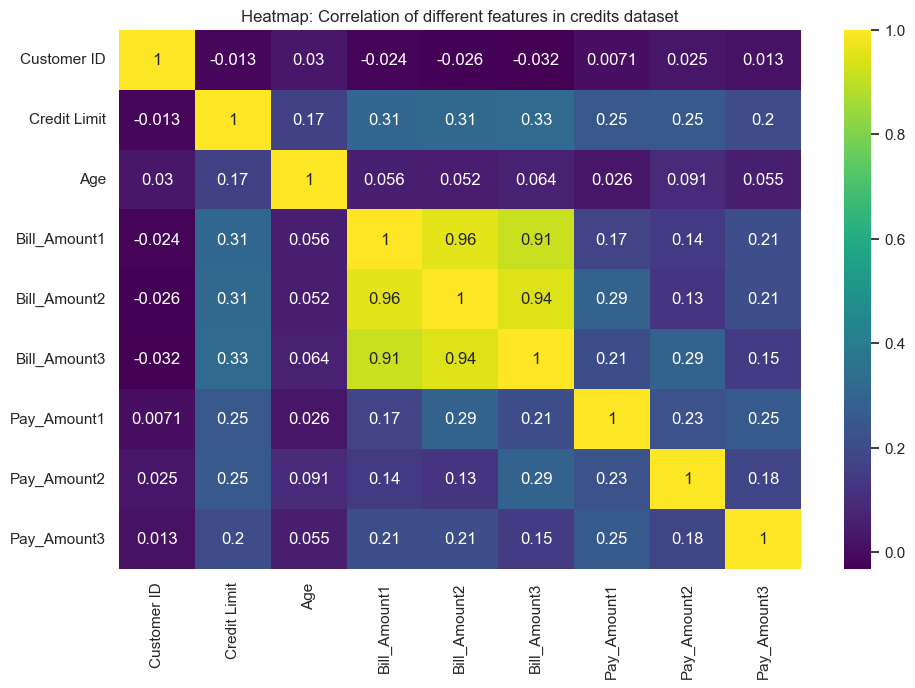

In [5]:

#Using seaborn to visualise the correlations in a heatmap
sns.set(rc={'figure.figsize':(11,7)})
corr_df = df.drop(['Default payment next month'], axis=1)

correlation = corr_df.corr()
sns.heatmap(correlation, cmap='viridis', annot=True)

#Using matplotlib to produce the plots
plt.title("Heatmap: Correlation of different features in credits dataset")
plt.show()

<font size = 4>

As we can see from the heatmap, all of the bill amounts have similar correlation to the other variables, hence I can combine the different bill amounts into 1 column and the pay amounts to 1 column respectively.

Originally, I wanted to try and combine all of the bill amounts, however after further thinking I realised that the bill amounts do not accumulate and every bill amount is the remaining bill at the end of each month. Hence, this means that Bill_Amount3 is the final remaining bill.

In [6]:
df["Total_paid"] = ""
df['Total_paid'] = df['Pay_Amount1'] + df['Pay_Amount2'] + df['Pay_Amount3']

df.head()

Customer ID  Credit Limit  Gender    Education Marriage Status  Age  \
0            1         20000  female  univeresity         married   24   
1            2        120000  female  univeresity          single   26   
2            3         90000  female  univeresity          single   34   
3            4         50000  female  univeresity         married   37   
4            5         50000    male  univeresity         married   57   

   Bill_Amount1  Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  \
0          3913          3102           689            0          689   
1          2682          1725          2682            0         1000   
2         29239         14027         13559         1518         1500   
3         46990         48233         49291         2000         2019   
4          8617          5670         35835         2000        36681   

   Pay_Amount3  Default payment next month  Total_paid  
0            0                           1         689  
1         1000                           1        2000  
2         1000                           0        4018  
3         1200                           0        5219  
4        10000                           0       48681

<font size = 4>

Next, I did a bivariate analysis on the different features to see the distribution of the features against the condition of default payment. This is to see whether there are any patterns beforehand.

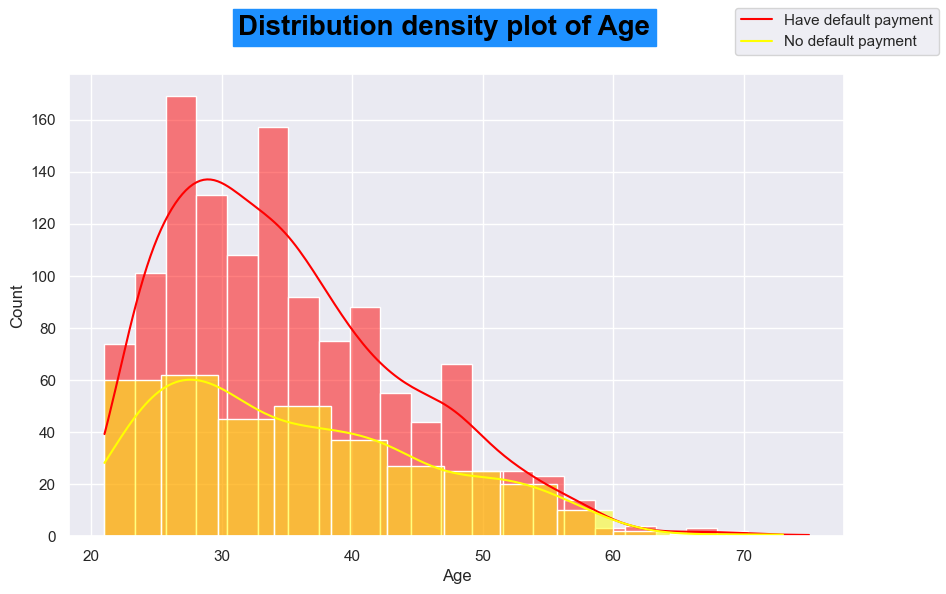

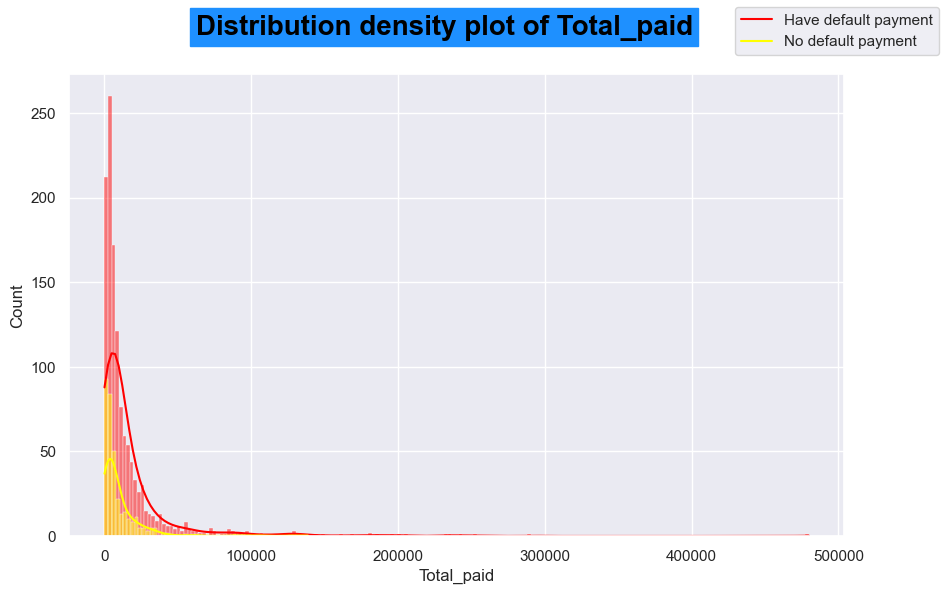

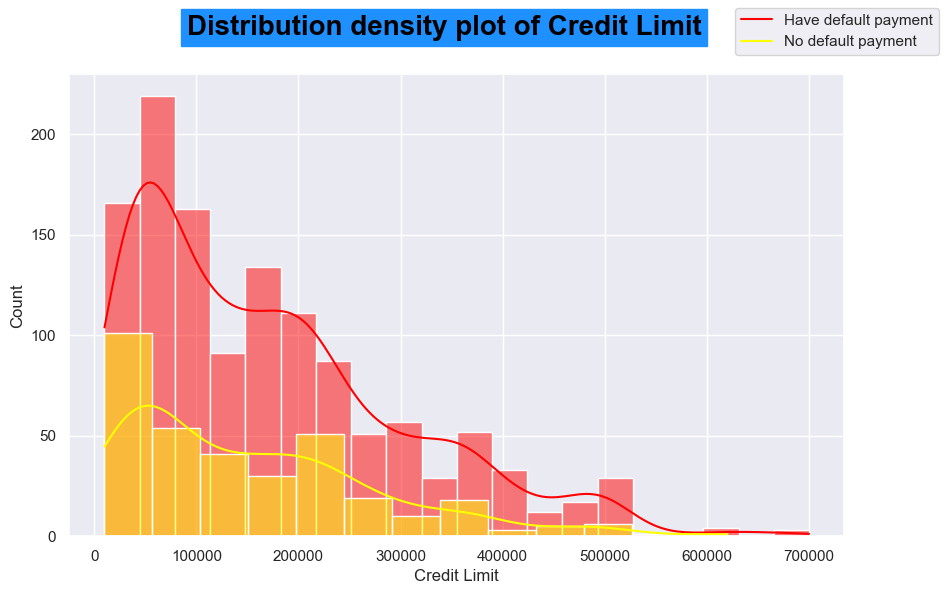

In [7]:
df_pay= df[df['Default payment next month']==0]
df_nopay = df[df['Default payment next month']==1]

features = ['Age', 'Total_paid','Credit Limit']

for feature in features:
  fig = plt.figure(figsize=(10,6))
  sns.histplot(data=df_pay, x=feature, kde=True, color='red', alpha=0.5)
  sns.histplot(data=df_nopay, x=feature, kde=True, color='yellow', alpha=0.5)

  fig.suptitle(f'Distribution density plot of {feature}',color='black',weight='bold',size=20, backgroundcolor= 'Dodgerblue')

  fig.legend(labels=['Have default payment','No default payment'])
  plt.show()

## **Feature engineering**

Firstly, I feel that Customer ID will not play a big part in classifying the data as it is just a unique identifier, therefore I will drop the column and I'll correct the typo made in the dataset (from univeresity to university) so that I won't make a mistake in my later codes

In [8]:
df = df.drop(['Customer ID'], axis = 1)
df['Education'] = df['Education'].replace(['univeresity'], 'university')

df.head()

Credit Limit  Gender   Education Marriage Status  Age  Bill_Amount1  \
0         20000  female  university         married   24          3913   
1        120000  female  university          single   26          2682   
2         90000  female  university          single   34         29239   
3         50000  female  university         married   37         46990   
4         50000    male  university         married   57          8617   

   Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  Pay_Amount3  \
0          3102           689            0          689            0   
1          1725          2682            0         1000         1000   
2         14027         13559         1518         1500         1000   
3         48233         49291         2000         2019         1200   
4          5670         35835         2000        36681        10000   

   Default payment next month  Total_paid  
0                           1         689  
1                           1        2000  
2                           0        4018  
3                           0        5219  
4                           0       48681

## **Data Preprocessing** 
> In this section, I will engineer the features. 

As we can see, `Gender`, `Education` and `Marriage Status` have categorical data. To use this data, I will have to encode it using 1 of 4 methods:

- pd.get_dummies()
- One Hot Encoder
- Label Encoder
- Ordinal Encoder

Firstly, `Gender` and `Marriage Status` are not ordinal, therefore I will have to use One Hot Encoder while `Education` is ordinal, which means I will use Ordinal/Label Encoder.

In [9]:
#Finding out the unique values in all the variables with categorical data.

a = df['Gender'].unique()
b = df['Education'].unique()
c = df['Marriage Status'].unique()

print(a,b,c)

#One hot encoder for gender as it is not ordinal
labelencoder = LabelEncoder()

# encode the 'Gender' column
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Marriage Status'] = labelencoder.fit_transform(df['Marriage Status'])

df.head()

['female' 'male'] ['university' 'post-graduate' 'high school'] ['married' 'single']


Credit Limit  Gender   Education  Marriage Status  Age  Bill_Amount1  \
0         20000       0  university                0   24          3913   
1        120000       0  university                1   26          2682   
2         90000       0  university                1   34         29239   
3         50000       0  university                0   37         46990   
4         50000       1  university                0   57          8617   

   Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  Pay_Amount3  \
0          3102           689            0          689            0   
1          1725          2682            0         1000         1000   
2         14027         13559         1518         1500         1000   
3         48233         49291         2000         2019         1200   
4          5670         35835         2000        36681        10000   

   Default payment next month  Total_paid  
0                           1         689  
1                           1        2000  
2                           0        4018  
3                           0        5219  
4                           0       48681

In [10]:
#Lastly, ordinal encoder for education as it is ordinal

from sklearn.preprocessing import OrdinalEncoder

# create an instance of the OrdinalEncoder class
encoder = OrdinalEncoder(categories=[['high school', 'university', 'post-graduate']])

# fit and transform the 'Education' column
df['Education'] = encoder.fit_transform(df[['Education']])

df.head()

Credit Limit  Gender  Education  Marriage Status  Age  Bill_Amount1  \
0         20000       0        1.0                0   24          3913   
1        120000       0        1.0                1   26          2682   
2         90000       0        1.0                1   34         29239   
3         50000       0        1.0                0   37         46990   
4         50000       1        1.0                0   57          8617   

   Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  Pay_Amount3  \
0          3102           689            0          689            0   
1          1725          2682            0         1000         1000   
2         14027         13559         1518         1500         1000   
3         48233         49291         2000         2019         1200   
4          5670         35835         2000        36681        10000   

   Default payment next month  Total_paid  
0                           1         689  
1                           1        2000  
2                           0        4018  
3                           0        5219  
4                           0       48681

In [11]:
df.head()

Credit Limit  Gender  Education  Marriage Status  Age  Bill_Amount1  \
0         20000       0        1.0                0   24          3913   
1        120000       0        1.0                1   26          2682   
2         90000       0        1.0                1   34         29239   
3         50000       0        1.0                0   37         46990   
4         50000       1        1.0                0   57          8617   

   Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  Pay_Amount3  \
0          3102           689            0          689            0   
1          1725          2682            0         1000         1000   
2         14027         13559         1518         1500         1000   
3         48233         49291         2000         2019         1200   
4          5670         35835         2000        36681        10000   

   Default payment next month  Total_paid  
0                           1         689  
1                           1        2000  
2                           0        4018  
3                           0        5219  
4                           0       48681

<font size = 4>
Take note that in Education, 0 is high school, 1 is university and 2 is post graduate. In gender, 0 is female while 1 is male and in Marriage Status 0 is married while 1 is single.<br>

Now that we have done our encoding, we can move on to our exploratory data analysis.

<font size = 4>
In this task, I feel that the False Positives are the most important to avoid as it may force customers to make default payment even though they may not need to. With that context set, I will list out a few ways of determining the results produced by the model.<br>

Since our feature space is not extremely large, we can afford to plot out a Pairplot to visualise the distribution of data points with relation to Target variable Default Payment

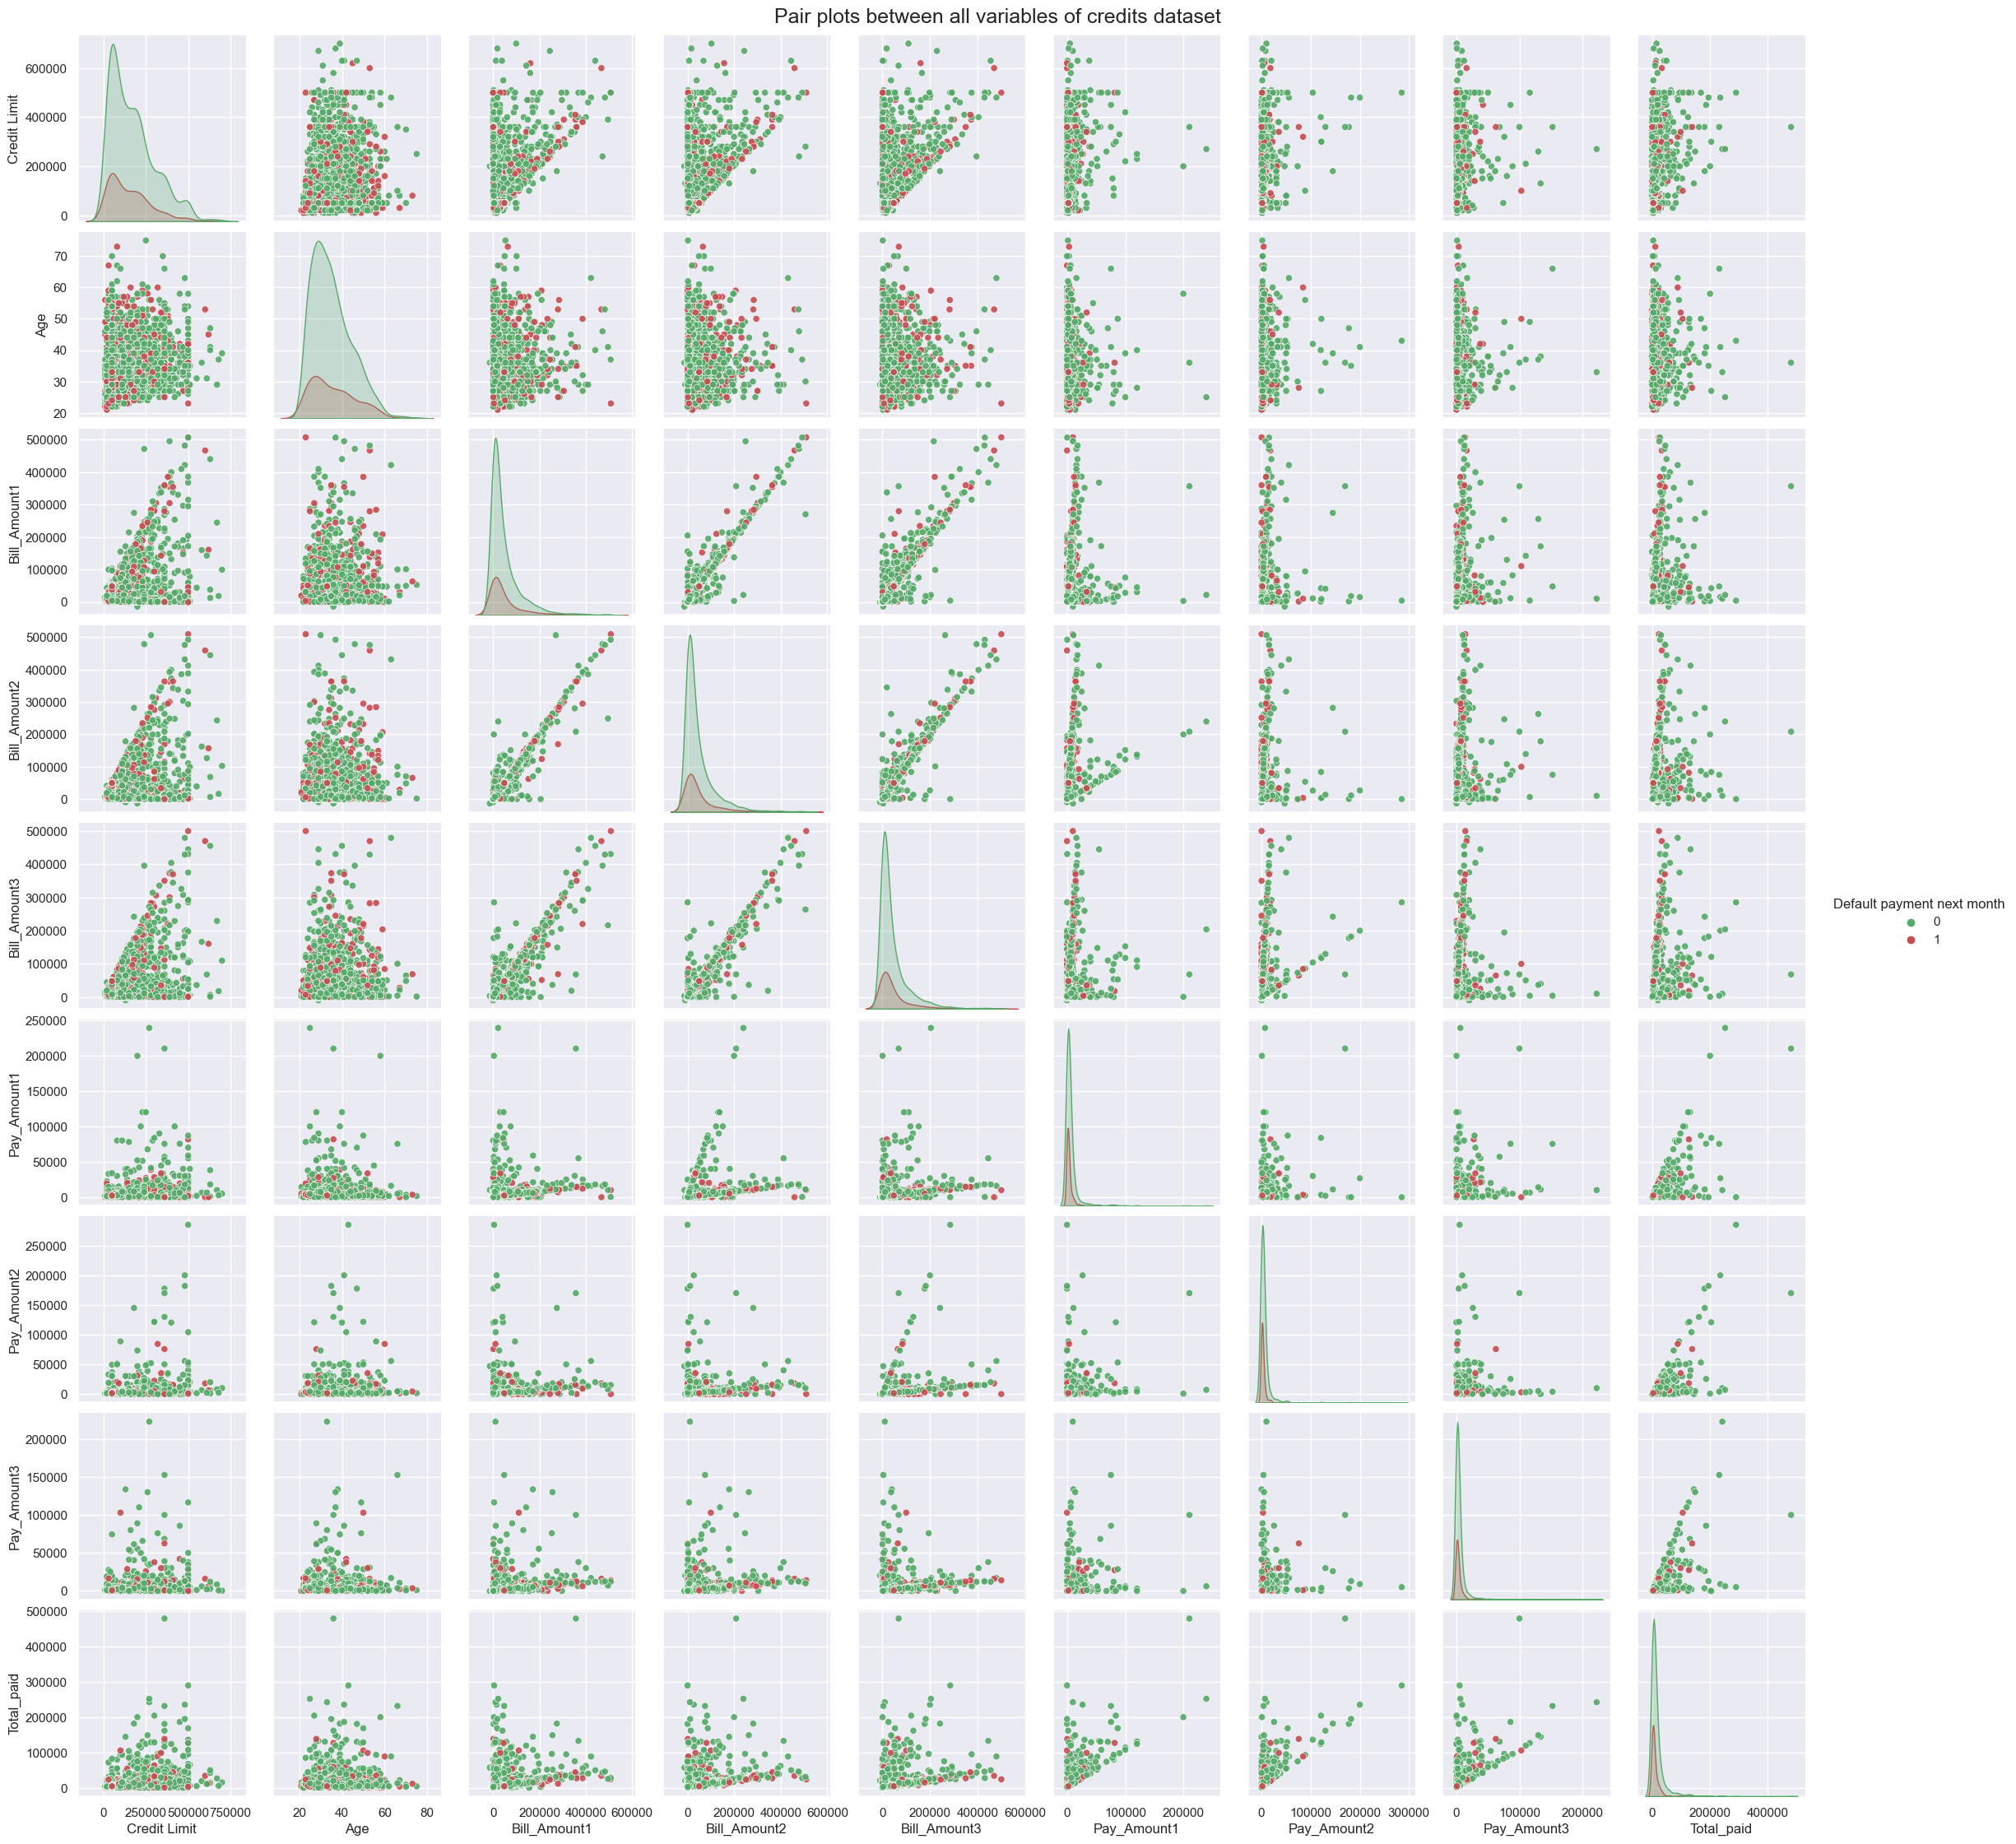

In [12]:
df_nom = df.drop(['Gender','Education','Marriage Status'], axis=1)

g = sns.pairplot(
    df_nom,
    hue="Default payment next month",
    palette=["g", "r"],
    plot_kws=dict(alpha=0.9),
)
g.fig.suptitle("Pair plots between all variables of credits dataset", y=1.001, fontsize=18)
plt.show()

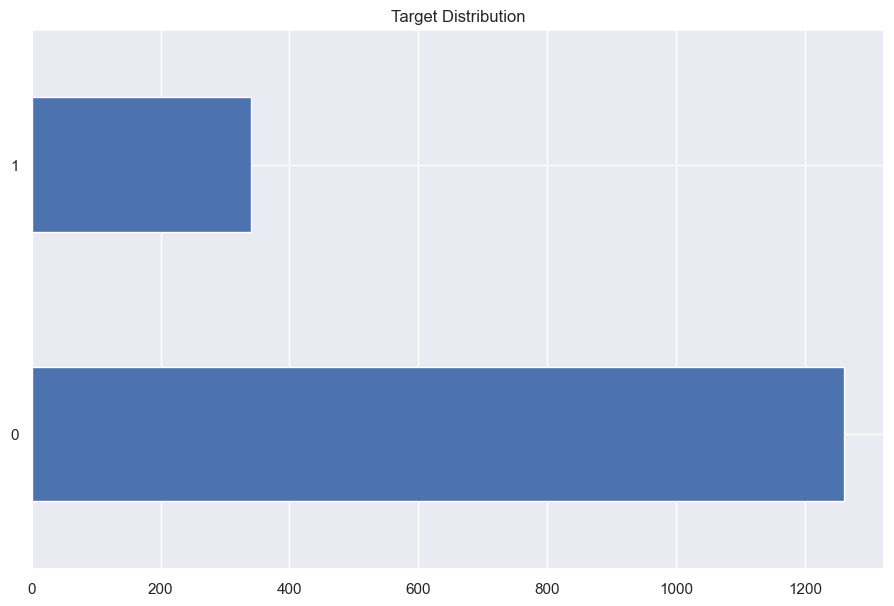

In [13]:
ax = (
    df["Default payment next month"].value_counts().plot(kind="barh", title="Target Distribution")
)

<font size = 4>

Before I split my data, I will normalise my data. This is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. Since most of my models do not make any assumptions of the distributions of the data, it will be very beneficial if I can bring it all to the same range.

In [14]:
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler,Normalizer

# Select the continuous columns to be standardized
continuous_cols = ['Credit Limit', 'Age', 'Total_paid','Bill_Amount1',	'Bill_Amount2',	'Bill_Amount3',	'Pay_Amount1',	'Pay_Amount2',	'Pay_Amount3']

# Create a Normalizer object
scaler = MaxAbsScaler()

# Standardize the selected columns
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

df.head()

Credit Limit  Gender  Education  Marriage Status       Age  Bill_Amount1  \
0      0.028571       0        1.0                0  0.320000      0.007707   
1      0.171429       0        1.0                1  0.346667      0.005282   
2      0.128571       0        1.0                1  0.453333      0.057588   
3      0.071429       0        1.0                0  0.493333      0.092550   
4      0.071429       1        1.0                0  0.760000      0.016972   

   Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  Pay_Amount3  \
0      0.006092      0.001378     0.000000     0.002416     0.000000   
1      0.003387      0.005365     0.000000     0.003507     0.004489   
2      0.027546      0.027121     0.006349     0.005261     0.004489   
3      0.094718      0.098595     0.008365     0.007081     0.005387   
4      0.011134      0.071679     0.008365     0.128643     0.044893   

   Default payment next month  Total_paid  
0                           1    0.001435  
1                           1    0.004167  
2                           0    0.008371  
3                           0    0.010873  
4                           0    0.101419

In [15]:
main_df = df.drop(['Default payment next month'], axis = 1)
target_df = df['Default payment next month']

X_train, X_test, y_train, y_test = train_test_split(main_df, target_df, test_size=0.2, random_state=42, stratify= target_df) # stratify so that percentage of samples are presered

#Show the percentages of trained/tested data that are 0s
print(f"Percentage of label '0' in Training data: {(len(y_train[y_train == 0]) / len(y_train)) * 100}%")
print(f"Percentage of label '0' in Test data: {(len(y_test[y_test == 0]) / len(y_test)) * 100}%")

Percentage of label '0' in Training data: 78.75%
Percentage of label '0' in Test data: 78.75%


In [16]:
#I picked 10 as the number of features to select as it is a good balance between the number of features and the accuracy of the model
selector = SelectKBest(f_classif, k=10)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_feature_names = X_train.columns[selector.get_support()]

print("Selected features:", list(selected_feature_names))
X_train= X_train.drop(X_train.columns[~selector.get_support()], axis=1)
X_test = X_test.drop(X_test.columns[~selector.get_support()], axis=1)


Selected features: ['Credit Limit', 'Education', 'Marriage Status', 'Age', 'Bill_Amount2', 'Bill_Amount3', 'Pay_Amount1', 'Pay_Amount2', 'Pay_Amount3', 'Total_paid']


In [17]:
X_train.head()

Credit Limit  Education  Marriage Status       Age  Bill_Amount2  \
924      0.042857        1.0                1  0.320000      0.055794   
423      0.285714        1.0                0  0.506667      0.208009   
611      0.514286        2.0                1  0.386667      0.000000   
960      0.542857        2.0                1  0.573333      0.015478   
985      0.185714        0.0                1  0.573333      0.012523   

     Bill_Amount3  Pay_Amount1  Pay_Amount2  Pay_Amount3  Total_paid  
924      0.057157     0.007390     0.005962     0.004534    0.009327  
423      0.205352     0.018820     0.000000     0.015713    0.016667  
611      0.000000     0.000000     0.000000     0.000000    0.000000  
960     -0.000004     0.000163     0.000000     0.000000    0.000081  
985     -0.000004     0.026905     0.000007     0.004207    0.015358

## **Baseline Model**

List of all the possible evalutation Metrics:

- Accuracy
>Percent of correct predictions

- Precision
>Ability to find only relevant samples (not label a negative as a positive)

- Recall
>Ability to find all positive samples

- 'f1-score'
>Harmonic mean of precision and recall

- 'fβ-score'
>Same as f1-score but able to assign different weights to prescision and recall

'roc_auc'
>Area under the receiver operator characteristic curve

Baseline Accuracy Score: 0.7879
Baseline Precision Score: 0.0000
Baseline Recall Score: 0.0000
Baseline F1 Score: 0.0000
Baseline Roc_auc Score: 0.5000
Baseline Accuracy Score :0.7875
      Credit Limit  Education  Marriage Status       Age  Bill_Amount2  \
511       0.171429        1.0                1  0.466667      0.000471   
983       0.085714        0.0                0  0.653333      0.081584   
1371      0.257143        1.0                1  0.400000      0.030250   
1220      0.071429        1.0                1  0.320000      0.078230   
705       0.071429        2.0                1  0.346667      0.032190   
...            ...        ...              ...       ...           ...   
502       0.328571        0.0                1  0.613333      0.446552   
822       0.214286        1.0                0  0.666667      0.114398   
449       0.200000        0.0                0  0.400000      0.192462   
1291      0.028571        0.0                0  0.706667      0.026102   
45

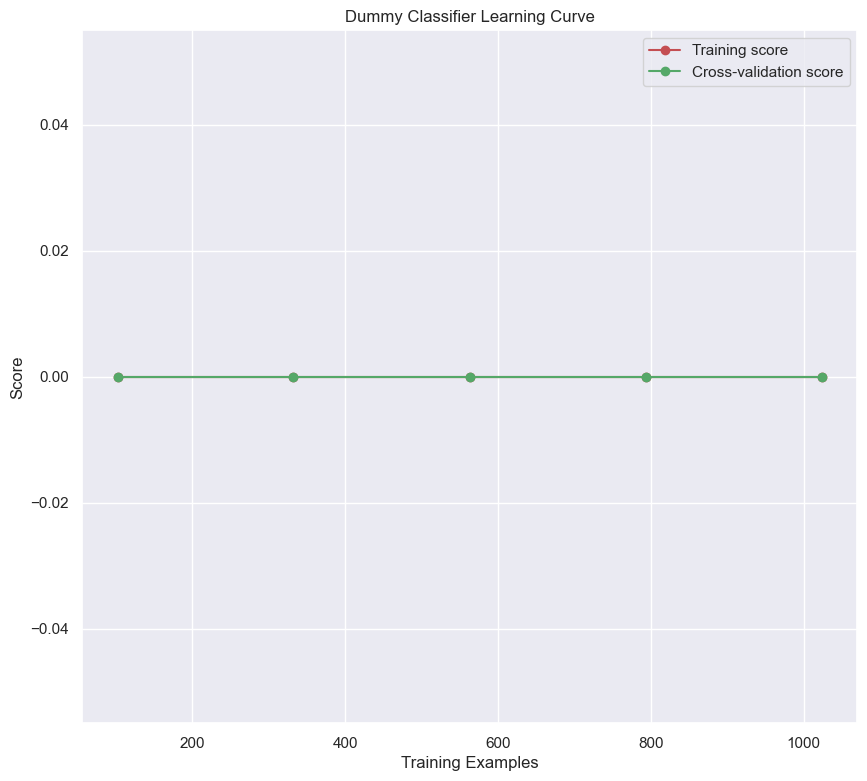

In [18]:
scoring_metrics = ['accuracy','precision', 'recall', 'f1', 'roc_auc']

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
dummy = DummyClassifier()

cv_score = cross_validate(DummyClassifier(), X_train, y_train, scoring= scoring_metrics , cv=cv, n_jobs=2, return_train_score=True)

for metric in scoring_metrics:
    print("Baseline {} Score: {:.4f}".format(metric.capitalize(), cv_score['train_'+metric].mean()))

dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train)

print("Baseline Accuracy Score :{:.4f}".format(dummy_clf.score(X_test, y_test)))
print(X_test)

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(dummy_clf, X_train, y_train, cv=5, n_jobs=2, train_sizes=np.linspace(0.1, 1, 5), scoring='recall')

plt.rcParams['figure.figsize'] = [10, 9]

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()

plt.title("Dummy Classifier Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

# set the grid on
ax = plt.subplot(111)
ax.grid('on')

plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [19]:
models = [
    ("KNN", KNeighborsClassifier()), 
    ("LogReg", LogisticRegression()), 
    ("DecisionTree", DecisionTreeClassifier()), 
    ("RandomForest", RandomForestClassifier()), 
    ("GradientBoost", GradientBoostingClassifier()),
    ('Ridge', RidgeClassifier()),
    ('SGD', SGDClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('GaussianNB', GaussianNB()),
    ('Extra Trees', ExtraTreesClassifier())
]   

scores = []

for name, model in models:
    model.fit(X_train, y_train)
    cv_score = cross_validate(model, X_train, y_train, scoring=scoring_metrics , cv=cv, n_jobs=2, return_train_score=True)
    score_df = pd.DataFrame(cv_score)
    mean_scores = score_df.mean().rename(name)
    scores.append(mean_scores)

score_df = pd.concat(scores, axis=1).T

# score_df

score_df.sort_values(by=['test_recall', 'train_recall', 'test_f1', 'train_f1'], ascending=False).style.apply(
    lambda x: ["background-color: green; color: white" if v else "" for v in x == x.max()]
).apply(
    lambda x: [
        "background-color: red; color: white" if v else "" for v in x == x.min()
    ]
)

Baseline Accuracy Score: 0.4949
Baseline Precision Score: 0.2115
Baseline Recall Score: 0.5066
Baseline F1 Score: 0.2984
Baseline Roc_auc Score: 0.5000
Baseline Accuracy Score: 0.4719
Baseline Precision Score: 0.1824
Baseline Recall Score: 0.4265
Baseline F1 Score: 0.2555
Baseline Roc_auc Score: 0.4553


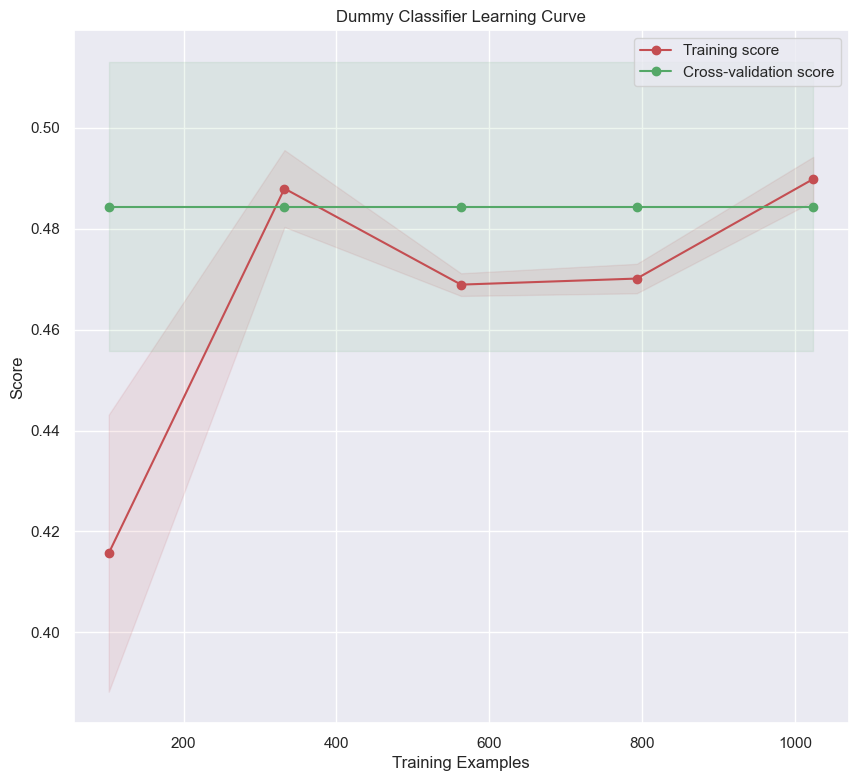

In [20]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Compute cross-validated scores for all metrics
dummy = DummyClassifier(strategy='uniform', random_state=42)
cv_scores = cross_validate(dummy, X_train, y_train, scoring = scoring_metrics, cv=cv, return_train_score=True)

# Print out cross-validated scores
for metric in scoring_metrics:
    print("Baseline {} Score: {:.4f}".format(metric.capitalize(), cv_scores['train_'+metric].mean()))

# Fit and score dummy classifier on test set
dummy_clf = DummyClassifier(strategy='uniform', random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print("Baseline Accuracy Score: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("Baseline Precision Score: {:.4f}".format(precision_score(y_test, y_pred)))
print("Baseline Recall Score: {:.4f}".format(recall_score(y_test, y_pred)))
print("Baseline F1 Score: {:.4f}".format(f1_score(y_test, y_pred)))
print("Baseline Roc_auc Score: {:.4f}".format(roc_auc_score(y_test, y_pred)))

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(DummyClassifier(strategy='uniform', random_state=42), X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1, 5), scoring='accuracy')

plt.rcParams['figure.figsize'] = [10, 9]

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()

plt.title("Dummy Classifier Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

plt.rcParams["figure.figsize"] = (20, 3)
# set the grid on
ax = plt.subplot(111)
ax.grid('on')

plt.show()

Finally, I will display the results and distribution of the guesses of my machine through a Confusion Matrix. This is what the confusion matrix represents.

<img src="./images/DefaultConfusionMatrix.png">

Confusion Matrix:
[[122 130]
 [ 39  29]]


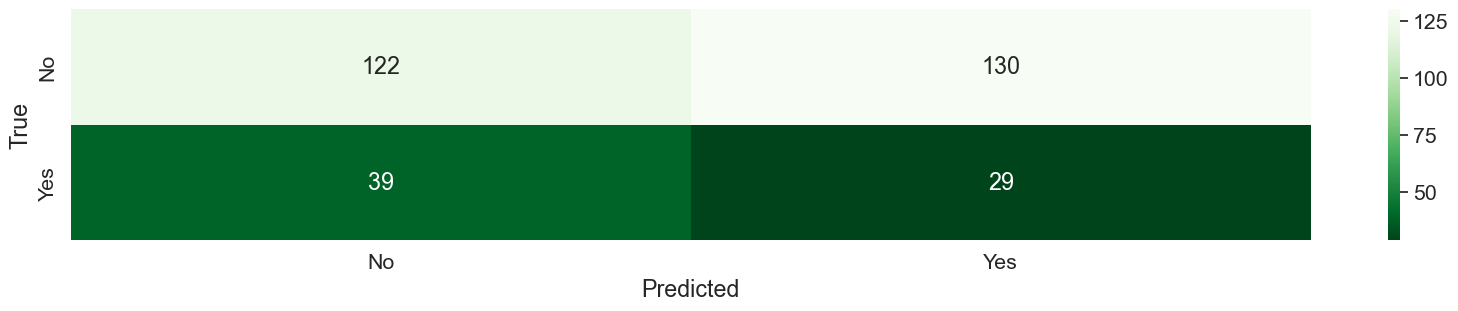

In [21]:
# Predict labels on the test set
y_pred = dummy_clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
sns.set(font_scale=1.4) # Adjust to fit the plot
sns.heatmap(cm, annot=True, cmap='Greens_r', fmt='g', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.rcParams["figure.figsize"] = (5, 5)
plt.show()

In [22]:
dummy_clf = DummyClassifier(strategy='uniform', random_state=42)
dummy_clf.fit(X_train, y_train)

dummy_clf.score(X_test, y_test)

0.471875

## **Model Selection and training with Default Hyperparameters**

To decide what model to use, we must first look at the different categories of models; ensemble and classical.

Ensemble models are generally better as they are a combination of different models. These different models are joined together to overcome their individual weakness. This includes errors such as overfitting the model, as the model is less likely to be bias due to the smoothing over the different errors each model has. It also can be used in more situations as compared to classical (individual) models.

So why do we consider classical models?

Well classical models work better with smalller datasets as compared to ensemble datasets. When looking at this project, not only is the data unbalanced, but the amount of data is quite little too, at 1600 datapoints. Furthermore, as the data is heavily unbalanced towards the non default payers, it further shrinks the dataset and the predicting power of the model.

Due to the variance of advantages and disadvantages, I will be using a mix of classical and ensemble models as they each have their own advantages and disadvantages, making it hard to decide on 1 side. For the classical models I'll pick `Decision Tree` and `Gaussian Naive Bayes` and for the ensemble models, I'll pick `Random Forest` and `Gradient Boost`.

In [23]:
# Utility function for confusion matrix

def plot_confusion_matrix(cm, ypred, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
            ypred1 = ypred 
            # Compute confusion matrix
            cm = confusion_matrix(y_test, ypred1)

            # Print the confusion matrix
            print("Confusion Matrix:")
            print(cm)

            # Plot confusion matrix
            sns.set(font_scale=1.4) # Adjust to fit the plot
            sns.heatmap(cm, annot=True, cmap='Greens_r', fmt='g', xticklabels=['No default', 'Default Payment'], yticklabels=['No default', 'Default Payment'])
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.rcParams["figure.figsize"] = (5, 5)
            plt.show()


def pipe_funct(steps, model, X_train, y_train, X_test, y_test):
    pipeline = Pipeline(steps)
    pipeline.fit(X_train, y_train)
    ypred = pipeline.predict(X_test)
    print(
    f"""{model}:
        {classification_report(y_test, ypred, digits=3)}
    """
    )
    plot_confusion_matrix(cm, ypred)


#From earlier, I displayed the learning curve for the dummy model. I will make it a function in this utility section.
def learncurve(model, model_name, X_train, y_train):
    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1, 5), scoring='recall')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.rcParams["figure.figsize"] = (6, 6)
    plt.figure()

    plt.title(f"{model_name} Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")

    # set the grid on
    ax = plt.subplot(111)
    ax.grid('on')

    plt.show()

def grid_search_funct(model, param_grid, X_train, y_train, X_test, y_test):

    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_

    best_model = model.__class__(**best_params)

    # Fit the model on the training data
    best_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = best_model.predict(X_test)

    # Evaluate the performance of the model
    print(classification_report(y_test, y_pred))

    return best_model

## Random Forest

Looking at the results, we can also tell that feature selection works as my results went up from 0.048 to 0.059 (I sampled 3 times and found the average so that I can avoid any discrepancies.)

Random Forest:
                      precision    recall  f1-score   support

           0      0.789     0.952     0.863       252
           1      0.250     0.059     0.095        68

    accuracy                          0.762       320
   macro avg      0.520     0.506     0.479       320
weighted avg      0.675     0.762     0.700       320

    
Confusion Matrix:
[[240  12]
 [ 64   4]]


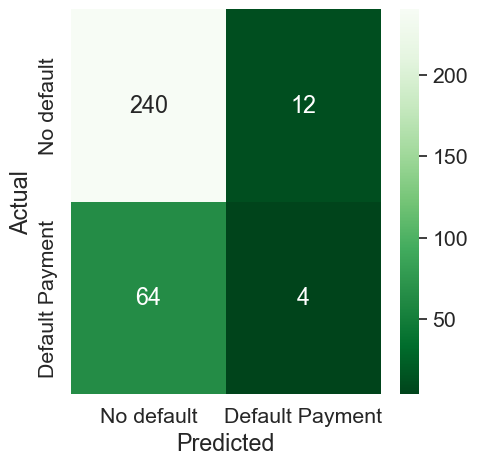

In [24]:
steps = [('select_kbest', SelectKBest(f_classif, k=10)), 
        ("Random Forest", RandomForestClassifier(random_state=42))]

pipe_funct(steps, "Random Forest", X_train, y_train, X_test, y_test)
#also how is it 6%..?

## Gaussian Naive Bayes

Gaussian Naive Bayes:
                      precision    recall  f1-score   support

           0      0.875     0.139     0.240       252
           1      0.225     0.926     0.362        68

    accuracy                          0.306       320
   macro avg      0.550     0.533     0.301       320
weighted avg      0.737     0.306     0.266       320

    
Confusion Matrix:
[[ 35 217]
 [  5  63]]


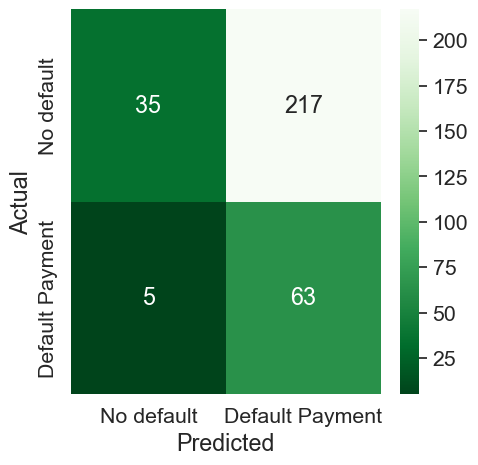

In [25]:
steps = [('select_kbest', SelectKBest(f_classif, k=10)), 
         ("Gaussian Naive Bayes", GaussianNB())]


pipe_funct(steps, "Gaussian Naive Bayes", X_train, y_train, X_test, y_test)

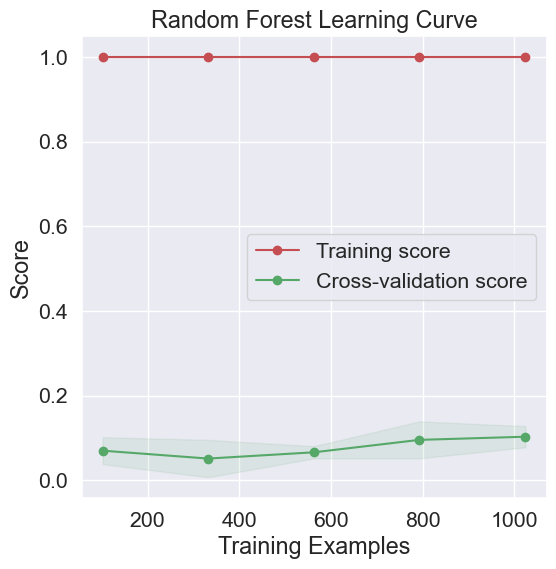

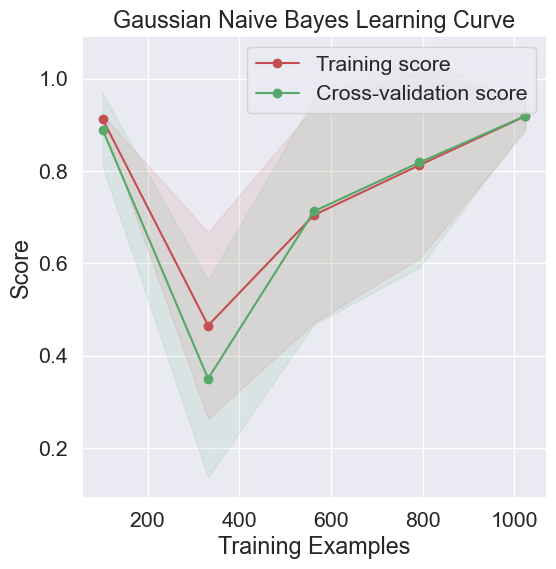

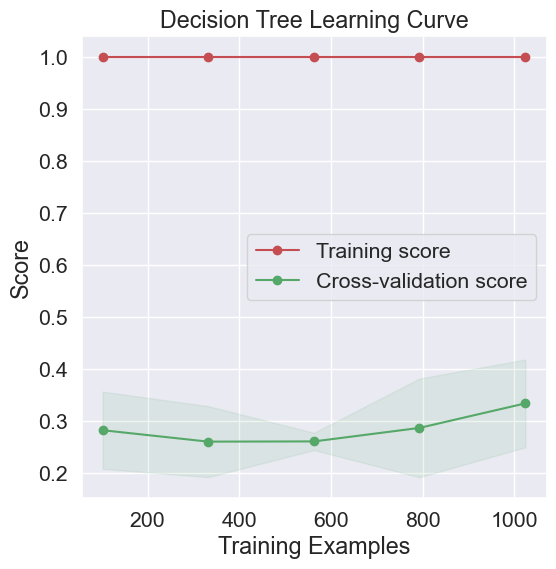

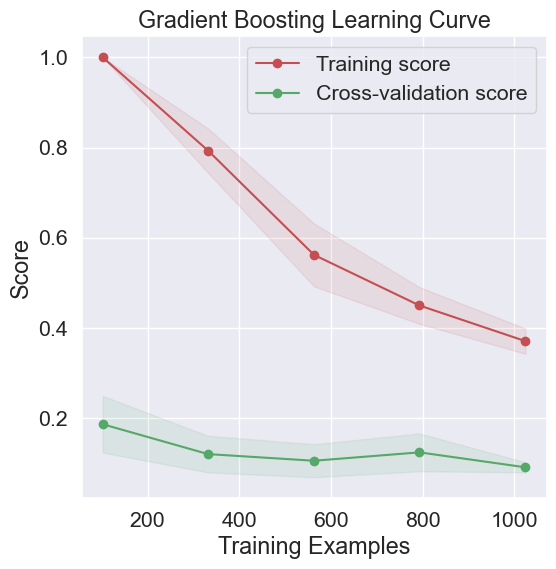

In [26]:
models = {"Random Forest": RandomForestClassifier(random_state=42), 
          "Gaussian Naive Bayes": GaussianNB(), 
          "Decision Tree": DecisionTreeClassifier(random_state=42), 
          "Gradient Boosting": GradientBoostingClassifier(random_state=42)
          }
        
for name, model in models.items():
    learncurve(model, name, X_train, y_train)
    # print(name, model)

## **Hyperparameter Tuning with Gaussian Naive Bayes**

Using GridSearch, I will find the best hyperparameter values by controlling the learning process of the machine learning model. With Gaussian Naive Bayes, you can use the Variance smoothing parameter, which specifies the portion of the largest variance of all features to be added to variances for stability of calculation. To put it simply, there's a zero probability problem with Gaussian Naive Bayes. The probability of a specific feature value given a class is estimated by counting the occurrences of that feature value in the training data and dividing it by the total number of observations in that class.<br> 

However, if a feature value is not present in the training data for a specific class, the resulting probability would be zero. As Gaussian Naive Bayes sees every feature as conditionally independent, if there are significant differences in the attribute distributions compared to the training dataset, the results will be unreliable. An important example of this is the case where a categorical attribute has a value that was not observed in training. In this case, the model will assign a 0 probability and be unable to make a prediction.

Tuned Model Performance:
Best var_smoothing: 1e-09
Accuracy: 0.3063
Precision: 0.2250
Recall: 0.9265
F1-Score: 0.3621
Gaussian Naive Bayes:
                      precision    recall  f1-score   support

           0      0.875     0.139     0.240       252
           1      0.225     0.926     0.362        68

    accuracy                          0.306       320
   macro avg      0.550     0.533     0.301       320
weighted avg      0.737     0.306     0.266       320

    
Confusion Matrix:
[[ 35 217]
 [  5  63]]


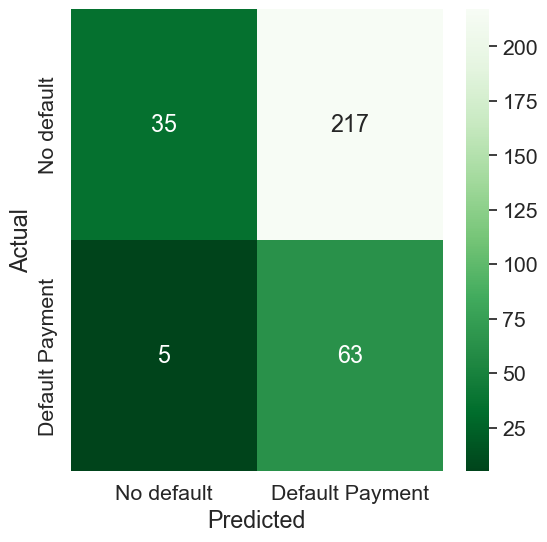

In [27]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
gnb = GaussianNB()

grid_search = GridSearchCV(gnb, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_var_smoothing = grid_search.best_params_['var_smoothing']
gnb_tuned = GaussianNB(var_smoothing=best_var_smoothing)

gnb_tuned.fit(X_train, y_train)
y_pred = gnb_tuned.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Tuned Model Performance:")
print(f"Best var_smoothing: {best_var_smoothing}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

steps = [('select_kbest', SelectKBest(f_classif, k=10)), 
         ("Gaussian Naive Bayes", GaussianNB())]


pipe_funct(steps, "Gaussian Naive Bayes", X_train, y_train, X_test, y_test)

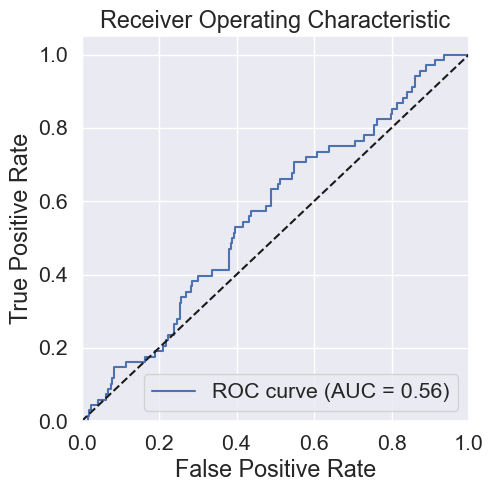

In [28]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_proba = gnb.predict_proba(X_test)[:, 1]  # Probabilities of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


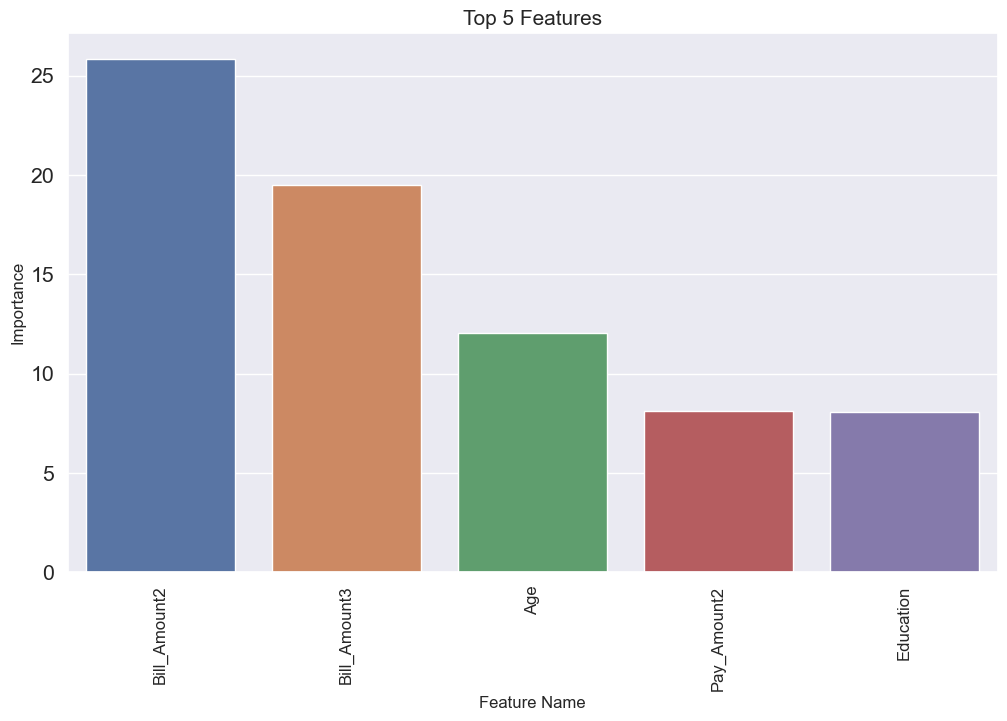

In [29]:
X_train_selected = selector.fit_transform(X_train, y_train)
selected_feature_scores = selector.scores_
selected_feature_indices = selected_feature_scores.argsort()[-10:][::-1]
selected_feature_names = X_train.columns[selected_feature_indices]

# Calculate relative importance percentages
sum_scores = selected_feature_scores.sum()
feature_importances = selected_feature_scores / sum_scores * 100

# Create a DataFrame with selected features and their importance percentages
df_feature_importances = pd.DataFrame({'Feature': selected_feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
df_feature_importances_sorted = df_feature_importances.sort_values(by='Importance', ascending=False)

# Plot the top 5 features
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="Feature", y="Importance", data=df_feature_importances_sorted.head(5), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
ax.set_title("Top 5 Features", fontsize=15)
ax.set_ylabel("Importance", fontsize=12)
ax.set_xlabel("Feature Name", fontsize=12)

plt.show()

## **Improvements**
 
<font size = 4>
Seeing as to how only 1 model as a recall percentage of over 50%, I'll take a step back, is there any way to make the results better? Some possible solutions are <br>
- Creating a hold out set in order to prevent the loss of data <br>
- Changing the train test split to make it more favourable for other models besides Gaussian Naive Bayes <br>
- Oversampling so that there is more data for the models to work with, which in turn improves the percentage.  <br>

Previously in my visualisation, we can see that there was a heavy imbalanced in the dataset as there were more 0s and 1s. This could have possibly affected the results as most models do not work well with bad datasets (unlike Gaussian Naive Bayes). 

<font size = 4>
To fix that, we will use either Adaptive Synthetic Sampling Approach(ADASYN) or Synthetic Minority Oversampling Technique (SMOTE). In this task, I would prefer ADASYN as SMOTE adds too much noisy data points ie useless data, and also generates instances that are in the same direction, which complicates the decision surface made by a few classifier algorithms. Another way going about this problem is random oversampling. I feel that ADASYN is better than random oversampling as random oversampling duplicates existing minority class samples to balance the dataset. On the other hand, ADASYN generates new synthetic samples that are closer to the decision boundary, thereby addressing the issue of over-fitting.<br>

SMOTE:<br>

<img src="./images/SMOTE Example.png">

and if you need cats to visualise it:<br>
<img src="./images/adasynvsmote.jpg">

In [30]:
counter = Counter(y_train)

print('Before', counter)

'''
By setting the random_state parameter to a fixed value,the algorithm generates the same synthetic samples 
each time it is run, which can make the results more reproducible
'''
ada = ADASYN(random_state = 42)
X_train, y_train = ADASYN().fit_resample(X_train, y_train)

counter = Counter(y_train)

print('After', counter)

print(f"Percentage of label '0' in Training data: {(len(y_train[y_train == 0]) / len(y_train)) * 100}%")


Before Counter({0: 1008, 1: 272})
After Counter({0: 1008, 1: 982})
Percentage of label '0' in Training data: 50.65326633165829%


Optimal number of features: 7


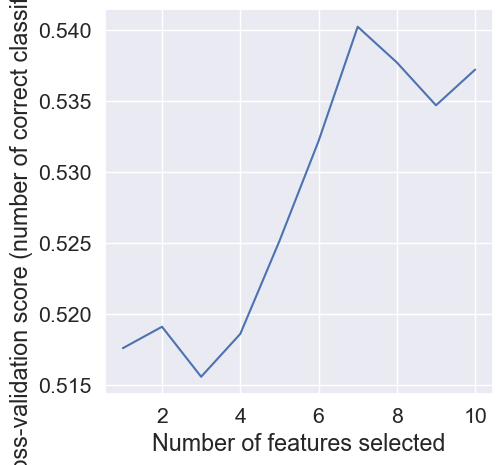

In [31]:
svm = SVC(kernel='linear')  # LinearSVC
min_features_to_select = 1  # Minimum number of features to consider

rfecv = RFECV(estimator=svm, step=1, cv=5, scoring='accuracy', min_features_to_select=min_features_to_select)
rfecv.fit(X_train, y_train)

print("Optimal number of features: %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (number of correct classifications)")
plt.plot(range(min_features_to_select, len(rfecv.cv_results_['mean_test_score']) + min_features_to_select), rfecv.cv_results_['mean_test_score'])
plt.show()

In [32]:
selector = SelectKBest(f_classif, k = rfecv.n_features_)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_feature_names = X_train.columns[selector.get_support()]

print("Selected features:", list(selected_feature_names))
X_train= X_train.drop(X_train.columns[~selector.get_support()], axis=1)
X_test = X_test.drop(X_test.columns[~selector.get_support()], axis=1)

Selected features: ['Credit Limit', 'Education', 'Marriage Status', 'Pay_Amount1', 'Pay_Amount2', 'Pay_Amount3', 'Total_paid']


      Credit Limit  Education  Marriage Status  Pay_Amount1  Pay_Amount2  \
0         0.042857        1.0                1     0.007390     0.005962   
1         0.285714        1.0                0     0.018820     0.000000   
2         0.514286        2.0                1     0.000000     0.000000   
3         0.542857        2.0                1     0.000163     0.000000   
4         0.185714        0.0                1     0.026905     0.000007   
...            ...        ...              ...          ...          ...   
1985      0.254866        0.0                1     0.021282     0.011470   
1986      0.214048        0.0                1     0.040010     0.011898   
1987      0.099210        0.0                1     0.010142     0.005067   
1988      0.257126        2.0                0     0.010896     0.000016   
1989      0.244631        2.0                0     0.028058     0.012844   

      Pay_Amount3  Total_paid  label  
0        0.004534    0.009327      0  
1        

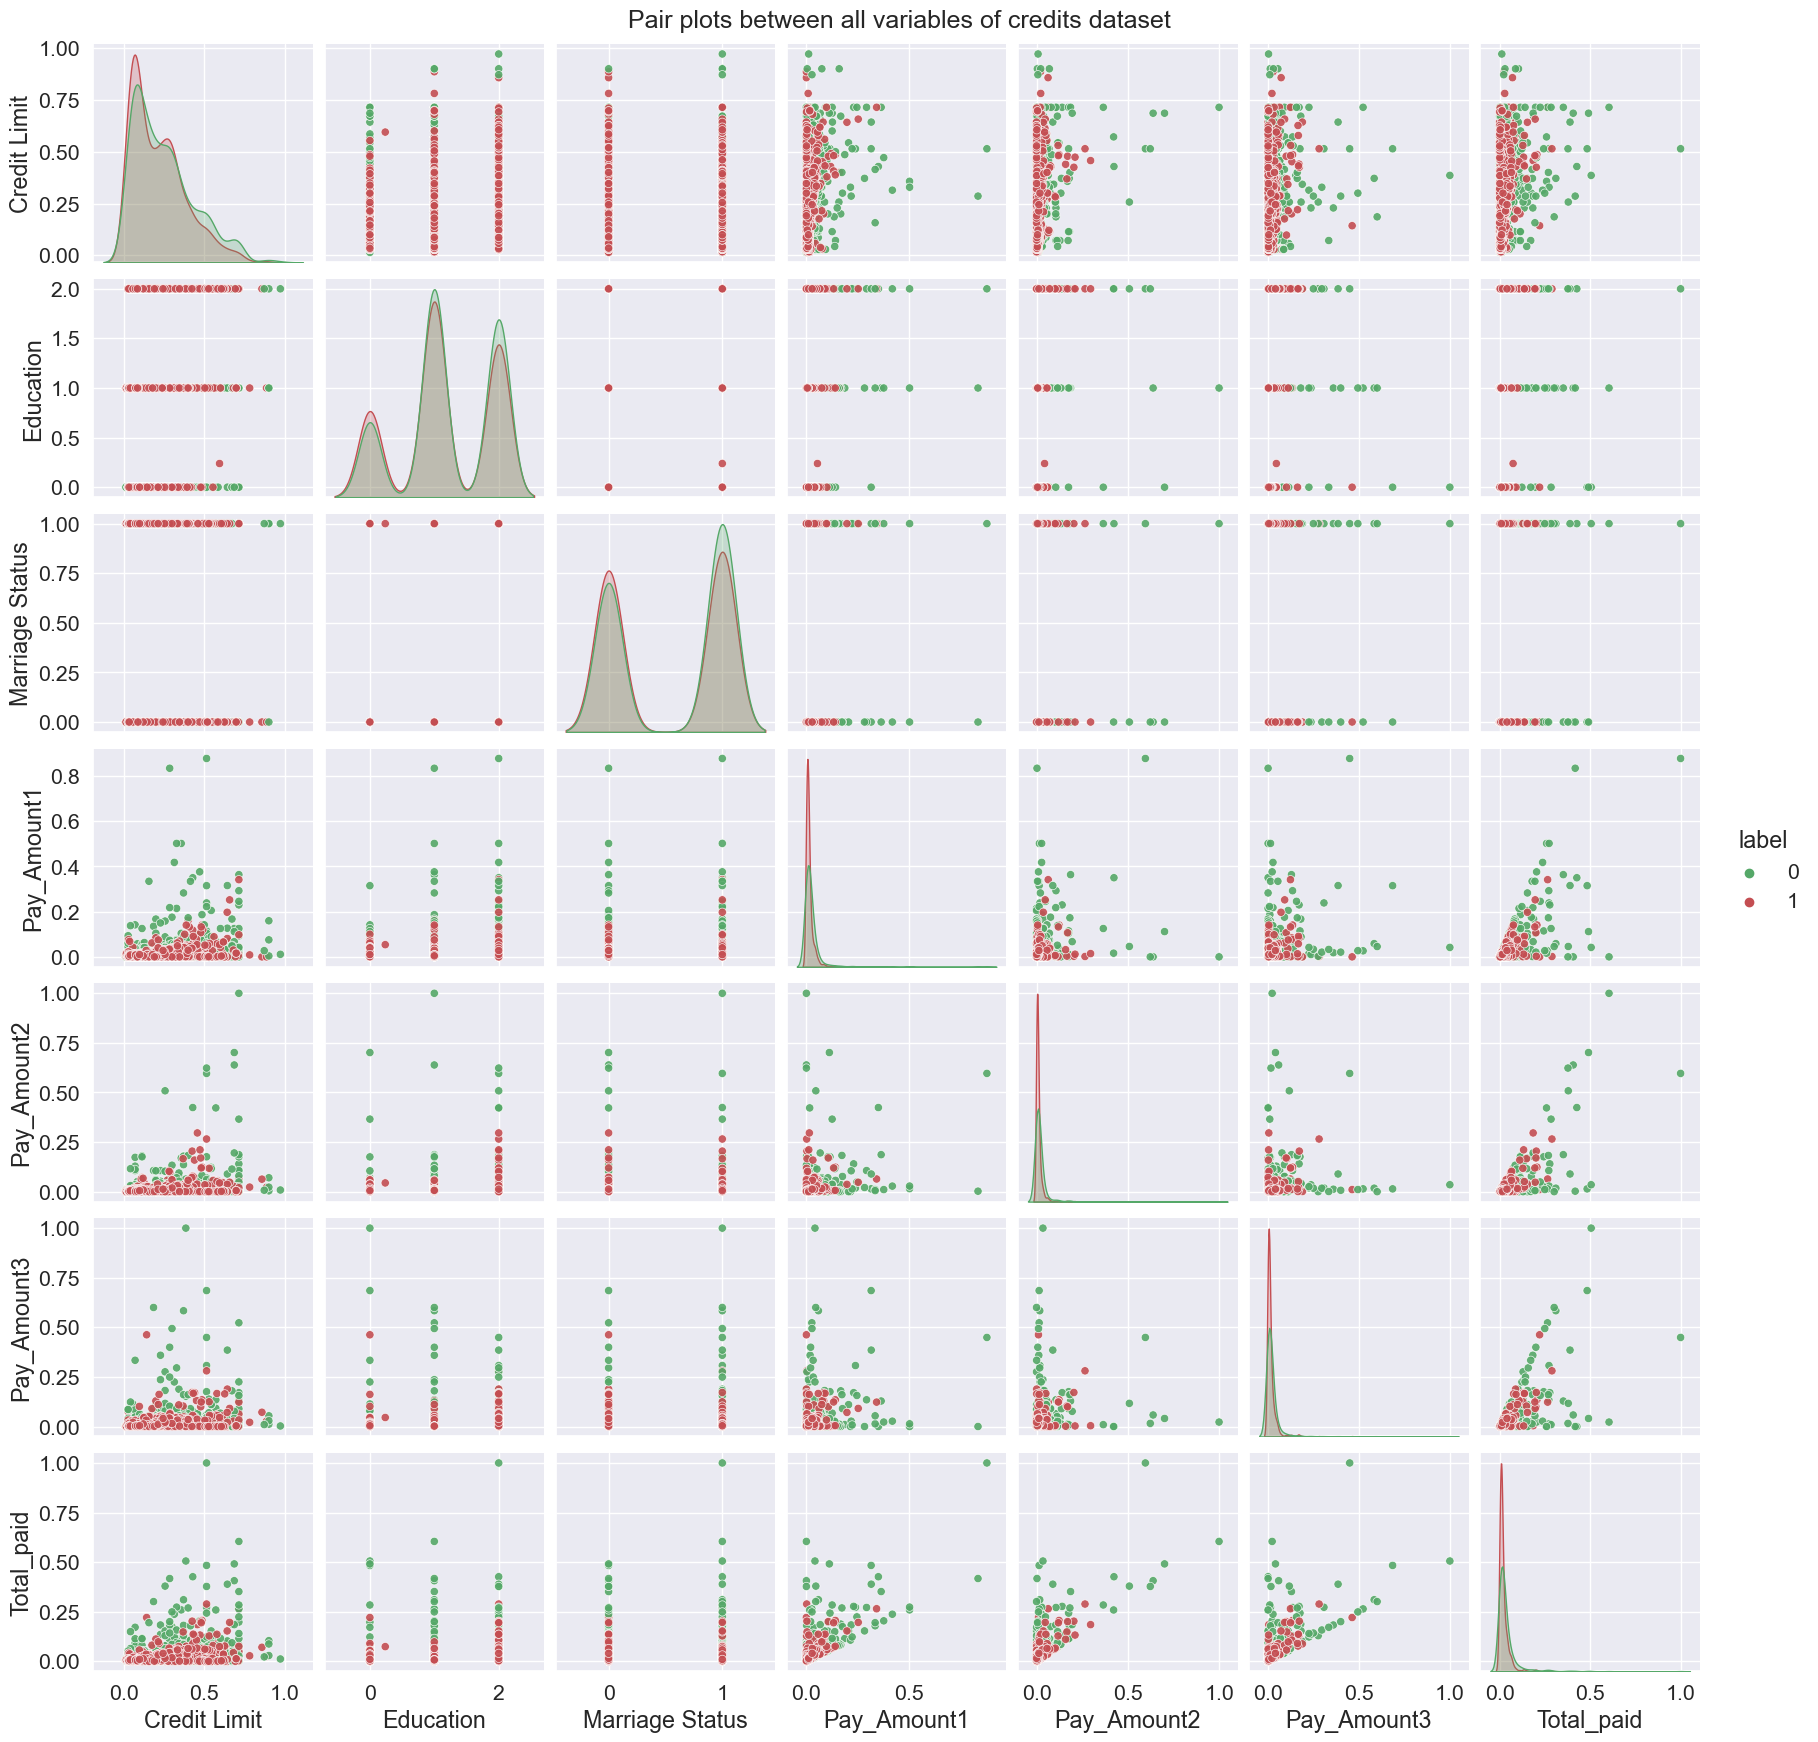

In [33]:
# Concatenate original and synthetic data points
synthetic_data = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)

# Optionally, you can assign column names to the synthetic_data DataFrame
column_names = list(X_train.columns) + ['label']
synthetic_data.columns = column_names

# Print the synthetic dataset
print(synthetic_data)

g = sns.pairplot(
    synthetic_data,
    hue="label",
    palette=["g", "r"],
    plot_kws=dict(alpha=0.9),
)
g.fig.suptitle("Pair plots between all variables of credits dataset", y=1.001, fontsize=18)
plt.show()

In [34]:
scoring_metrics = ['accuracy','precision', 'recall', 'f1', 'roc_auc']
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

models = [
    ("KNN", KNeighborsClassifier()), 
    ("LogReg", LogisticRegression()), 
    ("DecisionTree", DecisionTreeClassifier()), 
    ("RandomForest", RandomForestClassifier()), 
    ("GradientBoost", GradientBoostingClassifier()),
    ('Ridge', RidgeClassifier()),
    ('SGD', SGDClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('GaussianNB', GaussianNB()),
    ('Extra Trees', ExtraTreesClassifier())
]

scores = []

for name, model in models:
    model.fit(X_train, y_train)
    cv_score = cross_validate(model, X_train, y_train, scoring=scoring_metrics , cv=cv, n_jobs=2, return_train_score=True)
    score_df = pd.DataFrame(cv_score)
    mean_scores = score_df.mean().rename(name)
    scores.append(mean_scores)

score_df = pd.concat(scores, axis=1).T

# score_df

score_df.sort_values(by=['test_recall', 'train_recall', 'test_f1', 'train_f1'], ascending=False).style.apply(
    lambda x: ["background-color: green; color: white" if v else "" for v in x == x.max()]
).apply(
    lambda x: [
        "background-color: red; color: white" if v else "" for v in x == x.min()
    ]
)

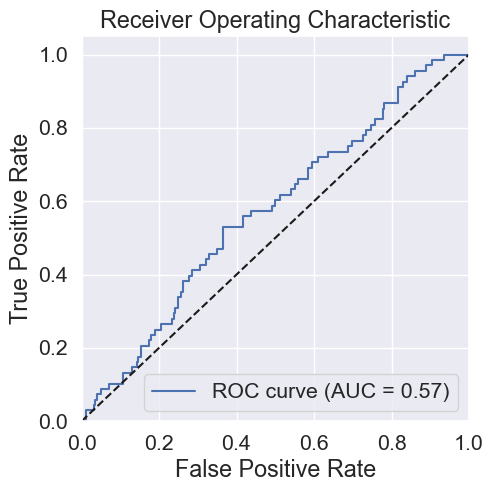

In [35]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_proba = gnb.predict_proba(X_test)[:, 1]  # Probabilities of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

As we can see, the results have generally increased. However, Gaussian Naive Bayes still has the highest recall percentage of 95%. Therefore, I can conclude that regardless of the size of the dataset, Gaussian Naive Bayes will perform the best and hence it is the chosen model for this binary classification task.

<hr>

## References:

Context behind default payments:<br>
https://gocardless.com/guides/posts/payment-defaults/ <br>
https://thepointsguy.com/guide/over-credit-limit/ <br>

Normalising data:<br>
https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff<br>

ADASYN vs SMOTE/What is random State:<br>
https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/<br>
https://medium.com/mlearning-ai/what-the-heck-is-random-state-24a7a8389f3d#<br>
https://www.kaggle.com/code/residentmario/oversampling-with-smote-and-adasyn<br>

Model selection: <br>
https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f <br>

Hyperparameter Tuning:<br>
https://towardsdatascience.com/parameters-and-hyperparameters-aa609601a9ac<br>

More about Naive Bayes:<br>
https://machinelearningmastery.com/better-naive-bayes/ <br>